# Lab 6: Entropia w obrazach

In [12]:
import requests
import numpy as np
import os
from PIL import Image, ImageOps
from collections import Counter
from math import log2
import matplotlib.pyplot as plt

%matplotlib inline

## Wczytywanie zdjęć

In [13]:
im_dir = "photos"
images = []

for file in os.listdir(im_dir):
    im = Image.open(f'{im_dir}/{file}')
    images.append(im)

## Liczenie entropii

In [18]:
def entropy(pixels):
    probs = [count / len(pixels) for count in Counter(pixels).values()]
    entropy = -sum([p * log2(p) for p in probs])
    return entropy


def img_entropy(im_grey, kernel_size):
    if kernel_size < 3 and kernel_size % 2 == 0:
        raise Exception('invalid kernel size')
    
    k = int((kernel_size - 1) / 2)
    im_entropy = np.empty(im_gray.shape)
    
    for row in range(im_gray.shape[0]):
        for col in range(im_gray.shape[1]):
            # Left up corner of neigh
            x0 = max(row - k, 0)
            y0 = max(col - k, 0)
            
            # Right down corner of neigh
            x1 = min(row + k, im_gray.shape[0])
            y1 = min(col + k, im_gray.shape[1])
            
            neigh = im_gray[x0:x1, y0:y1]
            im_entropy[row, col] = entropy(neigh.flatten())
    
    return im_entropy

            

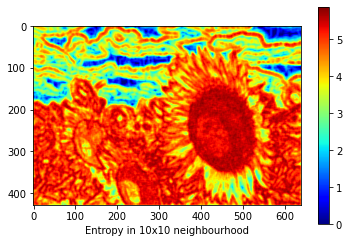

In [25]:
KERNEL_SIZE = 10

for im in images[0:1]:
    im_gray = np.array(ImageOps.grayscale(im))
    e = img_entropy(im_gray, KERNEL_SIZE)
    plt.imshow(e, cmap=plt.cm.jet)
    plt.xlabel('Entropy in 10x10 neighbourhood')
    plt.colorbar()